Pre-process data

In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
data_file = "countries5.csv"
data = pd.read_csv(data_file)
data = data.fillna(data.mean())
copy = data.copy()
copy.drop(columns=copy.columns[0], axis=1, inplace=True)

C:\Users\10705\AppData\Local\Temp\ipykernel_4552\1695931676.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


Find K-means and try to find the best value for K

C:\Users\10705\AppData\Local\Temp\ipykernel_4552\1447195609.py:6: ConvergenceWarning: Number of distinct clusters (80) found smaller than n_clusters (81). Possibly due to duplicate points in X.
  km = km.fit(copy)
C:\Users\10705\AppData\Local\Temp\ipykernel_4552\1447195609.py:6: ConvergenceWarning: Number of distinct clusters (80) found smaller than n_clusters (82). Possibly due to duplicate points in X.
  km = km.fit(copy)
C:\Users\10705\AppData\Local\Temp\ipykernel_4552\1447195609.py:6: ConvergenceWarning: Number of distinct clusters (80) found smaller than n_clusters (83). Possibly due to duplicate points in X.
  km = km.fit(copy)


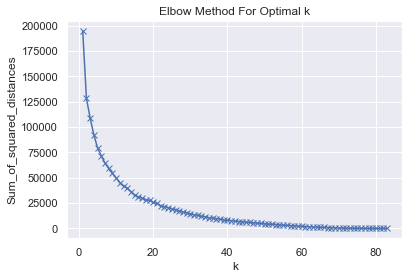

In [2]:
Sum_of_squared_distances = []

K = range(1,84)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(copy)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

I thus determined the best result to be K = 15 graphically, but if considering my knowledge to geography I may consider K = 10 roughly to be the case. I would try present both to see if it works. 

In [3]:
kmeans = KMeans(n_clusters=10)
kmeans = kmeans.fit(copy)
kmeansResult1 = kmeans.labels_
result1 = []
for j in range(10):
    current = []
    result1.append(current)

for i in range(len(copy)):
    value = kmeansResult1[i]
    result1[value].append(data["Country"].iloc[i])
print(result1)
print(kmeansResult1)
    
kmeans = KMeans(n_clusters=15)
kmeans = kmeans.fit(copy)
kmeansResult2 = kmeans.labels_    
result2 = []
for j in range(15):
    current = []
    result2.append(current)
for i in range(len(copy)):
    value = kmeansResult2[i]
    result2[value].append(data["Country"].iloc[i])
#print(result2)


[['Bangladesh', 'China', 'Egypt', 'India', 'Iraq', 'Morocco', 'Pakistan', 'Philippines', 'Slovak Rep'], ['Australia', 'Austria', 'Canada', 'Germany', 'Ireland', 'Israel', 'New Zealand', 'South Africa', 'Switzerland', 'United Kingdom', 'United States'], ['Chile', 'Costa Rica', 'Greece', 'Peru', 'Portugal', 'Slovenia', 'South Korea', 'Turkey', 'Uruguay'], ['Ecuador', 'Ethiopia', 'Hong Kong', 'Indonesia', 'Iran', 'Jamaica', 'Kenya', 'Sierra Leone', 'Singapore', 'Taiwan', 'Tanzania', 'Thailand', 'Vietnam', 'Zambia'], ['Denmark', 'Finland', 'Netherlands', 'Norway', 'Sweden'], ['Argentina', 'Belgium', 'Czech Republic', 'France', 'Hungary', 'Italy', 'Japan', 'Malta', 'Poland', 'Spain'], ['Colombia', 'El Salvador', 'Ghana', 'Mexico', 'Nigeria', 'Trinidad and Tobago', 'Venezuela'], ['Brazil', 'Kuwait', 'Lebanon', 'Libya', 'Malaysia', 'Saudi Arabia', 'Suriname', 'United Arab Emirates'], ['Bulgaria', 'Croatia', 'Guatemala', 'Panama', 'Romania', 'Russia', 'Serbia'], ['Estonia', 'Latvia', 'Lithuani

In [4]:
from math import sqrt

def manhattan(v1,v2):
    res=0
    dimensions=min(len(v1),len(v2))

    for i in range(dimensions):
        res+=abs(v1[i]-v2[i])

    return res


def euclidean(v1,v2):
    res=0
    dimensions=min(len(v1),len(v2))
    for i in range(dimensions):
        res+=pow(abs(v1[i]-v2[i]),2)

    return sqrt(float(res))


def cosine(v1,v2):
    dotproduct=0
    dimensions=min(len(v1),len(v2))

    for i in range(dimensions):
        dotproduct+=v1[i]*v2[i]

    v1len=0
    v2len=0
    for i in range (dimensions):
        v1len+=v1[i]*v1[i]
        v2len+=v2[i]*v2[i]

    v1len=sqrt(v1len)
    v2len=sqrt(v2len)
    
    # we need distance here - 
    # we convert cosine similarity into distance
    return 1.0-(float(dotproduct)/(v1len*v2len))
  

def pearson(v1,v2):
    # Simple sums
    sum1=sum(v1)
    sum2=sum(v2)
  
    # Sums of the squares
    sum1Sq=sum([pow(v,2) for v in v1])
    sum2Sq=sum([pow(v,2) for v in v2])
  
    # Sum of the products
    pSum=sum([v1[i]*v2[i] for i in range(min(len(v1),len(v2)))])
  
    # Calculate r (Pearson score)
    numerator=pSum-(sum1*sum2/len(v1))
    denominator=sqrt((sum1Sq-pow(sum1,2)/len(v1))*(sum2Sq-pow(sum2,2)/len(v1)))
    if denominator==0: return 1.0
    
    # we need distance here - 
    # we convert pearson correlation into distance
    return 1.0-numerator/denominator


def tanimoto(v1,v2):
    c1,c2,shared=0,0,0

    for i in range(len(v1)):
        if v1[i]!=0 or v2[i]!= 0:
            if v1[i]!=0: c1+=1 # in v1
            if v2[i]!=0: c2+=1 # in v2
            if v1[i]!=0 and v2[i]!=0: shared+=1 # in both
    
    # we need distance here - 
    # we convert tanimoto overlap into distance
    return 1.0-(float(shared)/(c1+c2-shared))
class BiClusterNode:
    def __init__(self,vec,left=None,right=None,distance=0.0,id=None):
        self.left=left
        self.right=right
        self.vec=vec
        self.id=id
        self.distance=distance
def hcluster(rows,distance=euclidean):
    distances={}
    currentclustid=-1

    # Clusters are initially just the rows
    clust=[BiClusterNode(rows[i],id=i) for i in range(len(rows))]

    while len(clust)>1:
        lowestpair=(0,1)
        closest=distance(clust[0].vec,clust[1].vec)

        # loop through every pair looking for the smallest distance
        for i in range(len(clust)):
            for j in range(i+1,len(clust)):
                # distances is the cache of distance calculations
                if (clust[i].id,clust[j].id) not in distances:
                    distances[(clust[i].id,clust[j].id)]=distance(clust[i].vec,clust[j].vec)

                d=distances[(clust[i].id,clust[j].id)]

                if d<closest:
                    closest=d
                    lowestpair=(i,j)

        # calculate the average of the two clusters
        mergevec=[
            (clust[lowestpair[0]].vec[i]+clust[lowestpair[1]].vec[i])/2.0
                    for i in range(len(clust[0].vec))]

        # create the new cluster
        newcluster=BiClusterNode(mergevec,left=clust[lowestpair[0]],
                             right=clust[lowestpair[1]],
                             distance=closest,id=currentclustid)

        # cluster ids that weren't in the original set are negative
        currentclustid-=1
        del clust[lowestpair[1]]
        del clust[lowestpair[0]]
        clust.append(newcluster)

    return clust[0]

def printhclust(clust,labels=None,n=0):
    # indent to make a hierarchy layout
    for i in range(n):
        print (' ', end="")
    if clust.id<0:
    # negative id means that this is branch
        print ('-')
    else:
    # positive id means that this is an endpoint
        if labels==None: print (clust.id)
        else: print (labels[clust.id])

    # now print the right and left branches
    if clust.left!=None: printhclust(clust.left,labels=labels,n=n+1)
    if clust.right!=None: printhclust(clust.right,labels=labels,n=n+1)

In [5]:
# draw hierarchical clusters
from PIL import Image,ImageDraw

def getheight(clust):
    # Is this an endpoint? Then the height is just 1
    if clust.left==None and clust.right==None: return 1

    # Otherwise the height is the same of the heights of
    # each branch
    return getheight(clust.left)+getheight(clust.right)


def getdepth(clust):
    # The distance of an endpoint is 0.0
    if clust.left==None and clust.right==None: return 0

    # The distance of a branch is the greater of its two sides
    # plus its own distance
    return max(getdepth(clust.left),getdepth(clust.right))+clust.distance


def drawdendrogram(clust,labels,jpeg='clusters.jpg'):
    # height and width
    h=getheight(clust)*20
    w=1200
    depth=getdepth(clust)

    # width is fixed, so scale distances accordingly
    scaling=float(w-150)/depth

    # Create a new image with a white background
    img=Image.new('RGB',(w,h),(255,255,255))
    draw=ImageDraw.Draw(img)

    draw.line((0,h/2,10,h/2),fill=(255,0,0))

    # Draw the first node
    drawnode(draw,clust,10,(h/2),scaling,labels)
    img.save(jpeg,'JPEG')


def drawnode(draw,clust,x,y,scaling,labels):
    if clust.id<0:
        h1=getheight(clust.left)*20
        h2=getheight(clust.right)*20
        top=y-(h1+h2)/2
        bottom=y+(h1+h2)/2
        # Line length
        ll=clust.distance*scaling
        # Vertical line from this cluster to children
        draw.line((x,top+h1/2,x,bottom-h2/2),fill=(255,0,0))

        # Horizontal line to left item
        draw.line((x,top+h1/2,x+ll,top+h1/2),fill=(255,0,0))

        # Horizontal line to right item
        draw.line((x,bottom-h2/2,x+ll,bottom-h2/2),fill=(255,0,0))

        # Call the function to draw the left and right nodes
        drawnode(draw,clust.left,x+ll,top+h1/2,scaling,labels)
        drawnode(draw,clust.right,x+ll,bottom-h2/2,scaling,labels)
    else:
        # If this is an endpoint, draw the item label
        draw.text((x+5,y-7),labels[clust.id],(0,0,0))

-
 Slovak Rep
 -
  -
   -
    -
     -
      -
       Belgium
       France
      -
       -
        Hungary
        Japan
       -
        -
         Czech Republic
         Poland
        -
         Germany
         Italy
     -
      -
       -
        South Africa
        Switzerland
       -
        Ireland
        -
         New Zealand
         -
          Canada
          -
           United Kingdom
           -
            Australia
            United States
      -
       Austria
       Israel
    -
     -
      Latvia
      -
       Estonia
       Lithuania
     -
      -
       Denmark
       Sweden
      -
       Finland
       -
        Netherlands
        Norway
   -
    Jamaica
    -
     -
      -
       Malaysia
       Philippines
      -
       -
        Singapore
        Vietnam
       -
        India
        -
         Bangladesh
         -
          China
          Hong Kong
     -
      -
       -
        El Salvador
        -
         Colombia
         -
       

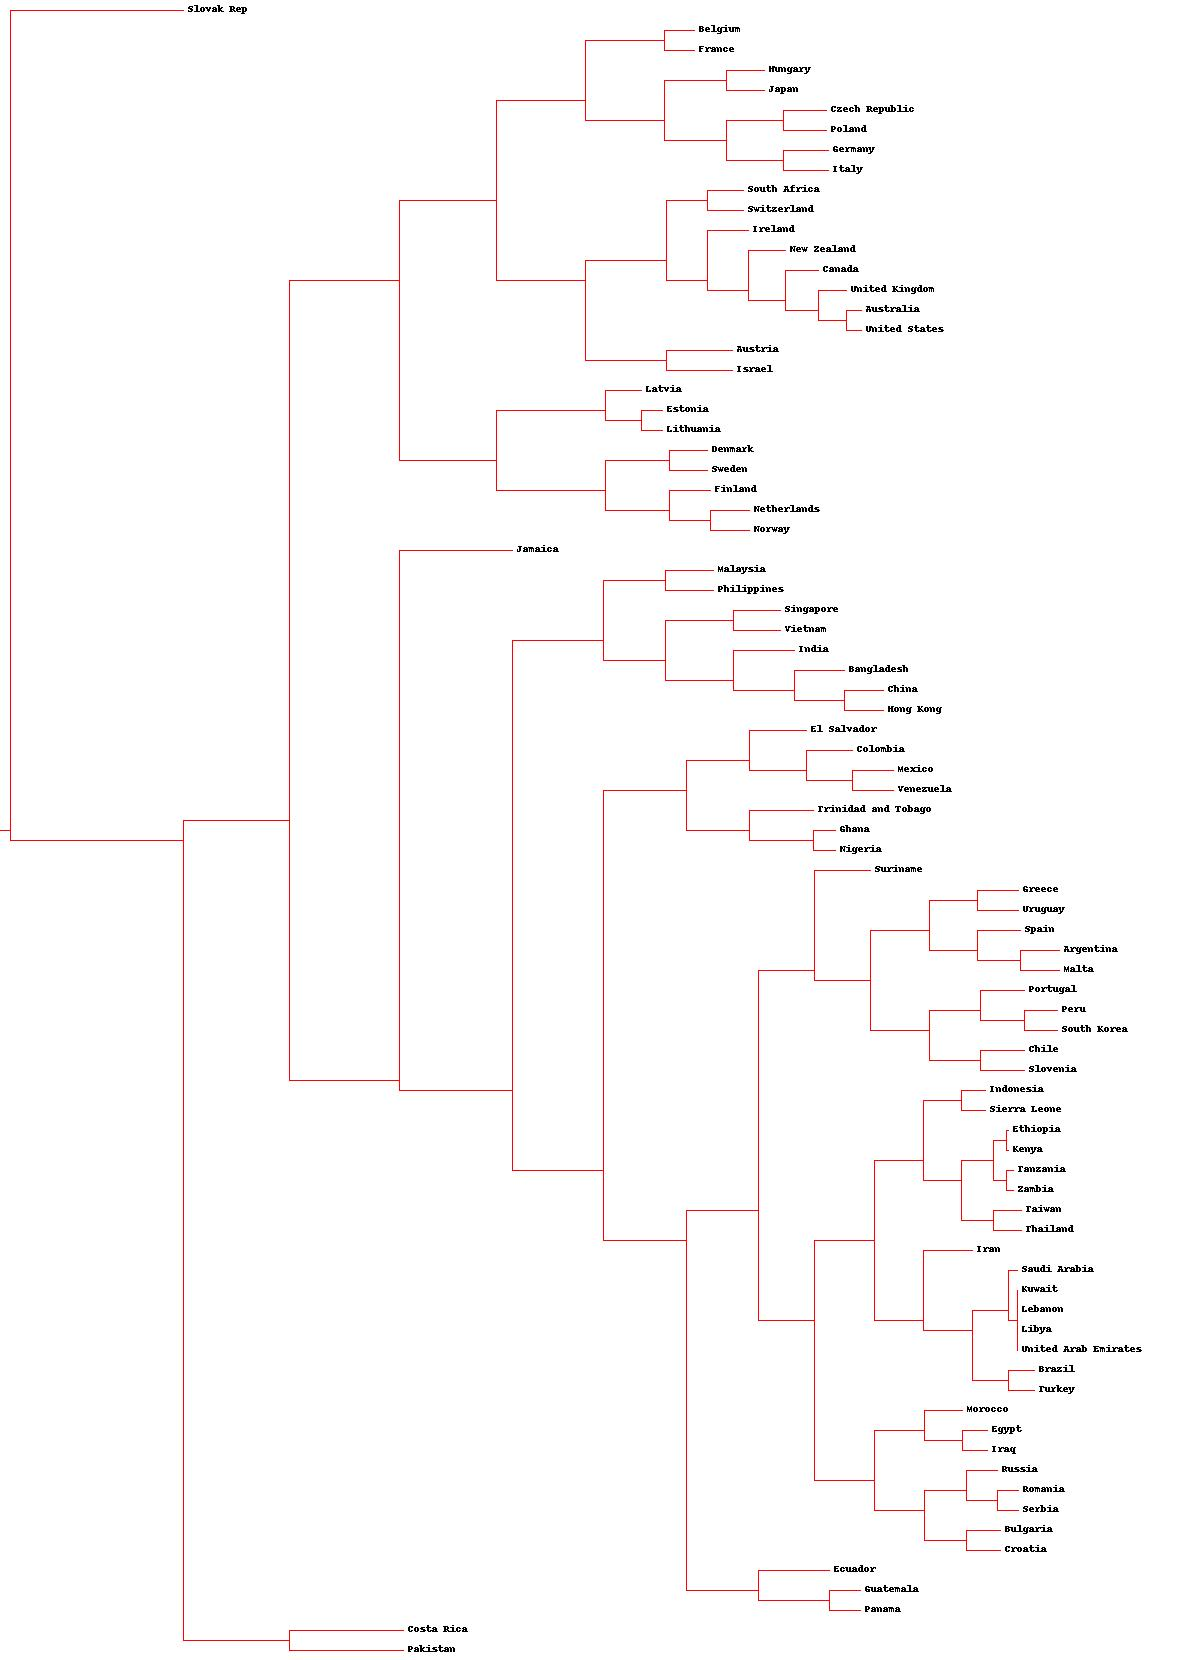

In [6]:
clust=hcluster(copy.to_numpy(),distance=euclidean)
print(clust)
first_column = data.iloc[:, 0].tolist()
printhclust(clust,labels=first_column)
drawdendrogram(clust,first_column,jpeg='countryclust_image.jpg')
from PIL import Image               # to load images
from IPython.display import display # to display images

pil_im = Image.open('countryclust_image.jpg')
display(pil_im)

Sklearn library version to find exactly 10 clusters

In [7]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=10)
model = model.fit(copy)
hierResults = model.labels_
hierresult1 = []
for j in range(10):
    current = []
    hierresult1.append(current)
for i in range(len(copy)):
    value = hierResults[i]
    hierresult1[value].append(data["Country"].iloc[i])
print(hierresult1)

[['Czech Republic', 'Germany', 'Hungary', 'Italy', 'Japan', 'Morocco', 'Poland', 'Slovak Rep'], ['Chile', 'Costa Rica', 'Guatemala', 'Panama', 'Peru', 'Portugal', 'Slovenia', 'South Korea'], ['Australia', 'Austria', 'Canada', 'Ireland', 'Israel', 'New Zealand', 'South Africa', 'Switzerland', 'United Kingdom', 'United States'], ['Colombia', 'El Salvador', 'Ghana', 'Mexico', 'Nigeria', 'Trinidad and Tobago', 'Venezuela'], ['China', 'Hong Kong', 'India', 'Jamaica', 'Singapore', 'Vietnam'], ['Ecuador', 'Ethiopia', 'Indonesia', 'Iran', 'Kenya', 'Kuwait', 'Lebanon', 'Libya', 'Malaysia', 'Philippines', 'Saudi Arabia', 'Sierra Leone', 'Taiwan', 'Tanzania', 'Thailand', 'United Arab Emirates', 'Zambia'], ['Argentina', 'Belgium', 'Brazil', 'France', 'Greece', 'Malta', 'Spain', 'Suriname', 'Turkey', 'Uruguay'], ['Estonia', 'Latvia', 'Lithuania'], ['Bangladesh', 'Bulgaria', 'Croatia', 'Egypt', 'Iraq', 'Pakistan', 'Romania', 'Russia', 'Serbia'], ['Denmark', 'Finland', 'Netherlands', 'Norway', 'Swede

In [8]:
#find average for each cluster.
resultdata = data.copy()
resultdata.set_index("Country", inplace = True)
kmeansaverage1 = []
for i in range(len(result1)):
    cluster = result1[i]
    sumpdi = 0
    sumidv = 0
    summas = 0
    sumuai = 0
    sumivr = 0
    count = 0
    for j in range(len(cluster)):  
        sumpdi = sumpdi + resultdata.loc[cluster[j]]["PDI"] 
        sumidv = sumidv + resultdata.loc[cluster[j]]["IDV"] 
        summas = summas + resultdata.loc[cluster[j]]["MAS"] 
        sumuai = sumuai + resultdata.loc[cluster[j]]["UAI"] 
        sumivr = sumivr + resultdata.loc[cluster[j]]["IVR"] 
        count += 1
    average = [sumpdi/count, sumidv/count, summas/count, sumuai/count, sumivr/count]
    kmeansaverage1.append(average)
print(kmeansaverage1)

kmeansaverage2 = []
for i in range(len(result2)):
    cluster = result2[i]
    sumpdi = 0
    sumidv = 0
    summas = 0
    sumuai = 0
    sumivr = 0
    count = 0
    for j in range(len(cluster)):  
        sumpdi = sumpdi + resultdata.loc[cluster[j]]["PDI"] 
        sumidv = sumidv + resultdata.loc[cluster[j]]["IDV"] 
        summas = summas + resultdata.loc[cluster[j]]["MAS"] 
        sumuai = sumuai + resultdata.loc[cluster[j]]["UAI"] 
        sumivr = sumivr + resultdata.loc[cluster[j]]["IVR"] 
        count += 1
    average = [sumpdi/count, sumidv/count, summas/count, sumuai/count, sumivr/count]
    kmeansaverage2.append(average)
#print(kmeansaverage2)


hieraverage = []
for i in range(len(hierresult1)):
    cluster = hierresult1[i]
    sumpdi = 0
    sumidv = 0
    summas = 0
    sumuai = 0
    sumivr = 0
    count = 0
    for j in range(len(cluster)):  
        sumpdi = sumpdi + resultdata.loc[cluster[j]]["PDI"] 
        sumidv = sumidv + resultdata.loc[cluster[j]]["IDV"] 
        summas = summas + resultdata.loc[cluster[j]]["MAS"] 
        sumuai = sumuai + resultdata.loc[cluster[j]]["UAI"] 
        sumivr = sumivr + resultdata.loc[cluster[j]]["IVR"] 
        count += 1
    average = [sumpdi/count, sumidv/count, summas/count, sumuai/count, sumivr/count]
    hieraverage.append(average)
print(hieraverage)

[[73.88888888888889, 32.77777777777778, 53.77777777777778, 46.111111111111114, 20.666666666666668], [21.09090909090909, 78.81818181818181, 54.81818181818182, 43.09090909090909, 63.203896103896106], [52.333333333333336, 23.11111111111111, 28.666666666666668, 81.0, 47.026984126984125], [58.642857142857146, 20.285714285714285, 39.42857142857143, 36.5, 41.78367346938775], [20.2, 76.8, 8.0, 33.2, 65.6], [49.0, 62.8, 53.5, 75.0, 43.8], [63.857142857142854, 14.428571428571429, 48.714285714285715, 60.0, 86.42857142857143], [76.375, 36.625, 41.625, 57.0, 50.52678571428571], [80.14285714285714, 21.714285714285715, 33.285714285714285, 78.28571428571429, 30.21224489795918], [33.0, 67.0, 13.0, 52.0, 15.0]]
[[52.75, 60.25, 66.625, 63.875, 31.75], [60.875, 13.5, 25.875, 78.875, 45.716071428571425], [20.7, 79.6, 54.5, 42.0, 65.52428571428571], [63.857142857142854, 14.428571428571429, 48.714285714285715, 60.0, 86.42857142857143], [61.833333333333336, 26.166666666666668, 48.0, 17.5, 32.54047619047619], 

Create json data for the website visualization, jsondata 2 is the data I used for generating the website

In [12]:
import json
array = [["Country Name", "Cluster"]]
myResult = kmeansResult1.tolist()
for i in range(len(copy)):
    value = myResult[i]
    countryname = data["Country"].iloc[i]
    array.append([countryname, value])
#print(array)
Myarray = [['China', 'Hong Kong', 'India', 'Jamaica', 'Singapore', 'Vietnam'], ['Kuwait', 'Lebanon', 'Libya', 'Malaysia', 'Morocco', 'Philippines', 'Saudi Arabia', 'Slovak Rep', 'United Arab Emirates'], ['Australia', 'Austria', 'Canada', 'Ireland', 'New Zealand', 'South Africa', 'Switzerland', 'United Kingdom', 'United States'], ['Argentina', 'Belgium', 'Czech Republic', 'France', 'Germany', 'Hungary', 'Israel', 'Italy', 'Japan', 'Malta', 'Poland', 'Spain'], ['Estonia', 'Latvia', 'Lithuania'], ['Brazil', 'Chile', 'Costa Rica', 'Greece', 'Peru', 'Portugal', 'Slovenia', 'South Korea', 'Suriname', 'Turkey', 'Uruguay'], ['Bulgaria', 'Croatia', 'Egypt', 'Guatemala', 'Iraq', 'Panama', 'Romania', 'Russia', 'Serbia'], ['Bangladesh', 'Ecuador', 'Ethiopia', 'Indonesia', 'Iran', 'Kenya', 'Pakistan', 'Sierra Leone', 'Taiwan', 'Tanzania', 'Thailand', 'Zambia'], ['Denmark', 'Finland', 'Netherlands', 'Norway', 'Sweden'], ['Colombia', 'El Salvador', 'Ghana', 'Mexico', 'Nigeria', 'Trinidad and Tobago', 'Venezuela']]
temparray = [["Country Name", "Cluster"]]
for i in range(len(Myarray)):
    curr = Myarray[i]
    for j in range(len(curr)):
        temparray.append([curr[j], i])
jsondata = json.dumps(array)
jsondata2 = json.dumps(temparray)
print(jsondata)
print(jsondata2)

[["Country Name", "Cluster"], ["Argentina", 5], ["Australia", 1], ["Austria", 1], ["Bangladesh", 0], ["Belgium", 5], ["Brazil", 7], ["Bulgaria", 8], ["Canada", 1], ["Chile", 2], ["China", 0], ["Colombia", 6], ["Costa Rica", 2], ["Croatia", 8], ["Czech Republic", 5], ["Denmark", 4], ["Ecuador", 3], ["Egypt", 0], ["El Salvador", 6], ["Ethiopia", 3], ["Estonia", 9], ["Finland", 4], ["France", 5], ["Germany", 1], ["Ghana", 6], ["Greece", 2], ["Guatemala", 8], ["Hong Kong", 3], ["Hungary", 5], ["India", 0], ["Indonesia", 3], ["Iran", 3], ["Iraq", 0], ["Ireland", 1], ["Israel", 1], ["Italy", 5], ["Jamaica", 3], ["Japan", 5], ["Kenya", 3], ["Kuwait", 7], ["Latvia", 9], ["Lebanon", 7], ["Libya", 7], ["Lithuania", 9], ["Malaysia", 7], ["Malta", 5], ["Mexico", 6], ["Morocco", 0], ["Netherlands", 4], ["New Zealand", 1], ["Nigeria", 6], ["Norway", 4], ["Pakistan", 0], ["Panama", 8], ["Peru", 2], ["Philippines", 0], ["Poland", 5], ["Portugal", 2], ["Romania", 8], ["Russia", 8], ["Saudi Arabia", 7],